### Execution time analysis for minimum algorithm

This notebook wants to highlight the differences in term of execution time of the various algorithm used, the comparision is made between:

- Serial algorithm
- GPU algorithm using atomic operation on a global variable
- GPU Optimistic algorithm 

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("time_analysis.csv", header=0, names=["type", "size", "time[us]"])
data.head()

,type,size,time[us]
0,atomic,100,143186
1,optimistic,100,1
2,serial,100,148
3,atomic,100,133908
4,optimistic,100,1


In [8]:
average_time = data.groupby(["type", "size"]).mean()
average_time

time[us]
type       size                 
atomic     100     139469.333333
           500     142549.000000
           1000    140934.666667
           5000    136867.333333
           10000   137380.666667
           100000  138708.000000
           500000  141515.666667
optimistic 100          1.000000
           500          5.000000
           1000        10.000000
           5000        51.000000
           10000      102.333333
           100000    1045.000000
           500000    5107.333333
serial     100        148.500000
           500        140.333333
           1000       134.000000
           5000       136.333333
           10000      136.000000
           100000     133.000000
           500000     135.666667

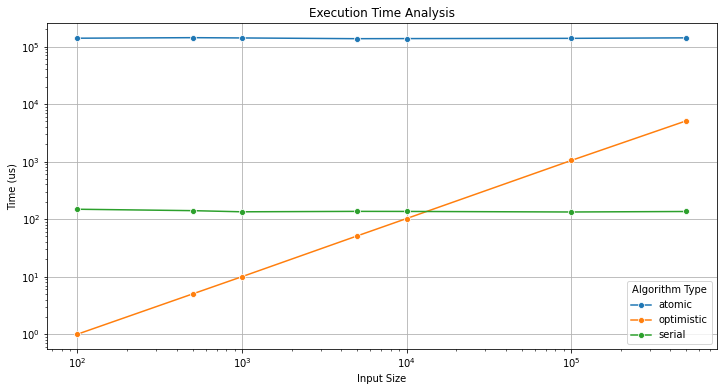

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reset the index to use 'type' and 'size' as columns
average_time_reset = average_time.reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_time_reset, x='size', y='time[us]', hue='type', marker='o')
plt.title('Execution Time Analysis')
plt.xlabel('Input Size')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time (us)')
plt.legend(title='Algorithm Type')
plt.grid(True)
plt.show()